# Comparison of Asthma and Diabetes Hospitalization Burden in Chicago

This notebook compares geographic patterns of asthma and diabetes related hospitalizations
across Chicago ZIP code groupings. To reduce year-to-year variability, the analysis uses
five-year average adjusted hospitalization rates (2007–2011).

The goal is to identify ZIP code groupings with elevated burden for asthma, diabetes, or both. Results are descriptive and do not establish causal relationships.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

asthma = pd.read_csv("../data/asthma_hospitalizations.csv")
diabetes = pd.read_csv("../data/diabetes_hospitalizations.csv")

# Clean column headers (handles accidental trailing spaces in public CSVs)
asthma.columns = asthma.columns.str.strip()
diabetes.columns = diabetes.columns.str.strip()

asthma.head()
diabetes.head()

,ZIP code (or aggregate),Hospitalizations 2000,Crude Rate 2000,Crude Rate 2000 Lower CI,Crude Rate 2000 Upper CI,Adjusted Rate 2000,Adjusted Rate 2000 Lower CI,Adjusted Rate 2000 Upper CI,Hospitalizations 2001,Crude Rate 2001,...,Adjusted Rate 2010,Adjusted Rate 2010 Lower CI,Adjusted Rate 2010 Upper CI,Hospitalizations 2011,Crude Rate 2011,Crude Rate 2011 Lower CI,Crude Rate 2011 Upper CI,Adjusted Rate 2011,Adjusted Rate 2011 Lower CI,Adjusted Rate 2011 Upper CI
0,"60601, 60602, 60603, 60604, 60605 & 60611",57.0,12.7,9.6,16.4,11.9,9.0,15.2,60.0,12.7,...,7.4,5.5,9.6,40.0,6.0,4.3,8.2,6.1,4.4,8.2
1,"60606, 60607 & 60661",41.0,19.0,13.6,25.7,27.3,19.3,36.6,30.0,13.1,...,11.5,7.1,16.9,31.0,9.1,6.2,12.9,17.4,11.3,24.9
2,60608,211.0,22.8,19.7,25.9,33.3,28.7,38.1,193.0,21.1,...,28.1,24.1,32.5,207.0,25.0,21.6,28.4,30.2,26.1,34.6
3,60609,242.0,30.5,26.6,34.3,40.6,35.4,46.3,176.0,22.6,...,37.6,32.4,43.2,176.0,27.1,23.1,31.1,32.6,27.8,37.8
4,60610 & 60654,80.0,16.8,13.4,21.0,17.9,14.1,22.0,79.0,16.5,...,15.1,11.8,18.7,78.0,14.8,11.7,18.5,15.4,12.1,19.0


In [17]:
years = [2007, 2008, 2009, 2010, 2011]

In [47]:
#asthma 5 year average table

asthma_rate_cols = [f"Adjusted Rate {y} (Ages 5-64 only)" for y in years]

asthma_5yr = asthma[["ZIP code (or aggregate)"] + asthma_rate_cols].copy()
asthma_5yr["asthma_avg_rate"] = asthma_5yr[asthma_rate_cols].mean(axis=1, skipna=True)

asthma_5yr = asthma_5yr.rename(columns={"ZIP code (or aggregate)": "zip_group"})[
    ["zip_group", "asthma_avg_rate"]
]

asthma_5yr.head()

,zip_group,asthma_avg_rate
0,"60606, 60607 & 60661",14.20
1,"60601, 60602, 60603, 60604, 60605 & 60611",8.32
2,60608,15.44
3,60609,27.96
4,60610 & 60654,24.08


In [49]:
#diabetes 5 year average table

diabetes_rate_cols = [f"Adjusted Rate {y}" for y in years]

diabetes_5yr = diabetes[["ZIP code (or aggregate)"] + diabetes_rate_cols].copy()
diabetes_5yr["diabetes_avg_rate"] = diabetes_5yr[diabetes_rate_cols].mean(axis=1, skipna=True)

diabetes_5yr = diabetes_5yr.rename(columns={"ZIP code (or aggregate)": "zip_group"})[
    ["zip_group", "diabetes_avg_rate"]
]

diabetes_5yr.head()

,zip_group,diabetes_avg_rate
0,"60601, 60602, 60603, 60604, 60605 & 60611",7.40
1,"60606, 60607 & 60661",19.02
2,60608,28.12
3,60609,37.02
4,60610 & 60654,13.90


In [51]:
#Create comparison fields

comparison = pd.merge(asthma_5yr, diabetes_5yr, on="zip_group", how="inner")

comparison["asthma_rank"] = comparison["asthma_avg_rate"].rank(ascending=False, method="dense").astype(int)
comparison["diabetes_rank"] = comparison["diabetes_avg_rate"].rank(ascending=False, method="dense").astype(int)

comparison.head()

,zip_group,asthma_avg_rate,diabetes_avg_rate,asthma_rank,diabetes_rank
0,"60606, 60607 & 60661",14.20,19.02,29,32
1,"60601, 60602, 60603, 60604, 60605 & 60611",8.32,7.40,41,49
2,60608,15.44,28.12,27,23
3,60609,27.96,37.02,16,16
4,60610 & 60654,24.08,13.90,20,43


## Table: Top ZIP Code Groupings by Condition (2007–2011)

The table below shows the union of ZIP code groupings that rank in the top 10 for asthma
and/or diabetes hospitalization burden (5-year average adjusted rates). It also indicates
which ZIP groups appear in the top 10 for both conditions.


In [53]:
#Comparison Table

TOP_N = 10

top_asthma_zip = set(comparison.nsmallest(TOP_N, "asthma_rank")["zip_group"])
top_diabetes_zip = set(comparison.nsmallest(TOP_N, "diabetes_rank")["zip_group"])

comparison["top10_asthma"] = comparison["zip_group"].isin(top_asthma_zip)
comparison["top10_diabetes"] = comparison["zip_group"].isin(top_diabetes_zip)
comparison["top10_both"] = comparison["top10_asthma"] & comparison["top10_diabetes"]

# Create a focused table showing the union of top 10 asthma and top 10 diabetes
focus_zip = sorted(list(top_asthma_zip.union(top_diabetes_zip)))

comparison_focus = (
    comparison[comparison["zip_group"].isin(focus_zip)]
    .sort_values(["top10_both", "top10_asthma", "top10_diabetes", "asthma_rank", "diabetes_rank"], ascending=[False, False, False, True, True])
    .reset_index(drop=True)   # <-- This is the "fix" so the bold numbers are not misleading
)

comparison_focus[[
    "zip_group",
    "asthma_avg_rate", "asthma_rank",
    "diabetes_avg_rate", "diabetes_rank",
    "top10_asthma", "top10_diabetes", "top10_both"
]]


,zip_group,asthma_avg_rate,asthma_rank,diabetes_avg_rate,diabetes_rank,top10_asthma,top10_diabetes,top10_both
0,60624,75.10,1,53.26,4,True,True,True
1,60636,71.92,2,55.66,3,True,True,True
2,60621,70.88,3,59.32,1,True,True,True
3,60649,55.10,4,49.62,9,True,True,True
4,60644,51.66,5,55.88,2,True,True,True
5,60651,51.16,6,51.72,6,True,True,True
6,60619,50.76,7,49.62,8,True,True,True
7,60612,49.72,8,51.82,5,True,True,True
8,60628,44.56,10,50.26,7,True,True,True
9,60637,46.10,9,40.10,13,True,False,False


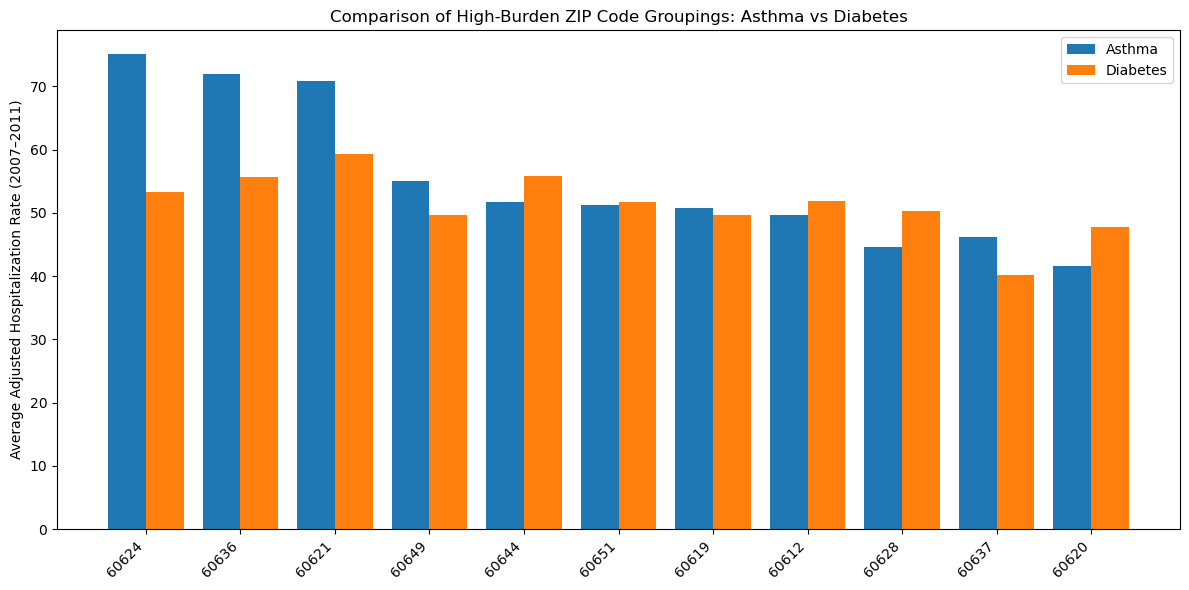

In [56]:
labels = comparison_focus["zip_group"].tolist()
asthma_vals = comparison_focus["asthma_avg_rate"].values
diabetes_vals = comparison_focus["diabetes_avg_rate"].values

x = np.arange(len(labels))
width = 0.40

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, asthma_vals, width, label="Asthma")
plt.bar(x + width/2, diabetes_vals, width, label="Diabetes")

plt.xticks(x, labels, rotation=45, ha="right")
plt.ylabel("Average Adjusted Hospitalization Rate (2007–2011)")
plt.title("Comparison of High-Burden ZIP Code Groupings: Asthma vs Diabetes")
plt.legend()
plt.tight_layout()
plt.show()


## Interpretation

High-burden ZIP code groupings for asthma and diabetes show partial overlap. Several ZIP
groups rank highly for both conditions, while others appear in the top 10 for only one
condition.

This suggests that chronic disease hospitalization burden is geographically concentrated
in some shared areas, but also includes condition-specific patterns. These results provide
a basis for contextual interpretation using socioeconomic indicators (e.g., hardship index),
while avoiding claims of causation.